In [1]:
import json
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
import random
from sklearn import cross_validation # used to test classifier
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics
from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')


plt.rcParams['figure.figsize'] = (20, 10) #Defining size of plots
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve # ROC Curves
from sklearn.metrics import auc # Calculating AUC for ROC's!
import warnings

warnings.filterwarnings('ignore')

C:\Users\amaha\Anaconda3\envs\py35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dj = pd.read_json('uber.json') # Reading the json file
df_main = pd.DataFrame(dj)

In [3]:
df_main.shape # Determining the size of the dataset

(51212, 15)

In [4]:
df_uber=df_main # Creating a copy of dataset

In [5]:
df_uber.head() # view dataset

,Date-time,currency_code,display_name,distance,duration,end_latitude,end_longitude,estimate,high_estimate,localized_display_name,low_estimate,product_id,start_latitude,start_longitude,time
0,2017-12-05 22:47:56,USD,uberPOOL,8.24,1080,42.314857,-71.056782,$8-11,12.0,uberPOOL,8.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:47:56
1,2017-12-05 22:47:56,USD,uberX,8.24,1080,42.314857,-71.056782,$18-23,23.0,uberX,18.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,42.342588,-71.122463,22:47:56
2,2017-12-05 22:47:56,USD,uberSUV,8.24,1080,42.314857,-71.056782,$50-63,63.0,uberSUV,50.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,42.342588,-71.122463,22:47:56
3,2017-12-05 22:47:56,USD,uberXL,8.24,1080,42.314857,-71.056782,$28-35,35.0,uberXL,28.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:47:56
4,2017-12-05 22:47:56,USD,UberBLACK,8.24,1080,42.314857,-71.056782,$41-51,51.0,UberBLACK,41.0,6c84fd89-3f11-4782-9b50-97c468b19529,42.342588,-71.122463,22:47:56


In [6]:
uber = df_uber[df_main.display_name != 'TAXI'] # Removing all records of Taxi because aim is to focus on trends on Uber

In [7]:
uber.head() # Loding dataset

,Date-time,currency_code,display_name,distance,duration,end_latitude,end_longitude,estimate,high_estimate,localized_display_name,low_estimate,product_id,start_latitude,start_longitude,time
0,2017-12-05 22:47:56,USD,uberPOOL,8.24,1080,42.314857,-71.056782,$8-11,12.0,uberPOOL,8.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:47:56
1,2017-12-05 22:47:56,USD,uberX,8.24,1080,42.314857,-71.056782,$18-23,23.0,uberX,18.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,42.342588,-71.122463,22:47:56
2,2017-12-05 22:47:56,USD,uberSUV,8.24,1080,42.314857,-71.056782,$50-63,63.0,uberSUV,50.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,42.342588,-71.122463,22:47:56
3,2017-12-05 22:47:56,USD,uberXL,8.24,1080,42.314857,-71.056782,$28-35,35.0,uberXL,28.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:47:56
4,2017-12-05 22:47:56,USD,UberBLACK,8.24,1080,42.314857,-71.056782,$41-51,51.0,UberBLACK,41.0,6c84fd89-3f11-4782-9b50-97c468b19529,42.342588,-71.122463,22:47:56


In [8]:
import datetime # import to use the date time functiuons

In [9]:
uber.dtypes # checking type of each column

Date-time                  object
currency_code              object
display_name               object
distance                  float64
duration                    int64
end_latitude              float64
end_longitude             float64
estimate                   object
high_estimate             float64
localized_display_name     object
low_estimate              float64
product_id                 object
start_latitude            float64
start_longitude           float64
time                       object
dtype: object

In [10]:
uber = uber.rename(columns = {'Date-time':'date_time'}) # Renaming Column

In [11]:
uber.head() # Viewing the table

,date_time,currency_code,display_name,distance,duration,end_latitude,end_longitude,estimate,high_estimate,localized_display_name,low_estimate,product_id,start_latitude,start_longitude,time
0,2017-12-05 22:47:56,USD,uberPOOL,8.24,1080,42.314857,-71.056782,$8-11,12.0,uberPOOL,8.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:47:56
1,2017-12-05 22:47:56,USD,uberX,8.24,1080,42.314857,-71.056782,$18-23,23.0,uberX,18.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,42.342588,-71.122463,22:47:56
2,2017-12-05 22:47:56,USD,uberSUV,8.24,1080,42.314857,-71.056782,$50-63,63.0,uberSUV,50.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,42.342588,-71.122463,22:47:56
3,2017-12-05 22:47:56,USD,uberXL,8.24,1080,42.314857,-71.056782,$28-35,35.0,uberXL,28.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:47:56
4,2017-12-05 22:47:56,USD,UberBLACK,8.24,1080,42.314857,-71.056782,$41-51,51.0,UberBLACK,41.0,6c84fd89-3f11-4782-9b50-97c468b19529,42.342588,-71.122463,22:47:56


In [12]:
df = pd.DataFrame(uber.date_time.str.split(' ',1).tolist(),
                                   columns = ['Date','Time'])
df.head() #to check the range of date in the file

,Date,Time
0,2017-12-05,22:47:56
1,2017-12-05,22:47:56
2,2017-12-05,22:47:56
3,2017-12-05,22:47:56
4,2017-12-05,22:47:56


In [13]:
print(min(df.Date)) # Display of date range
print(max(df.Date))

2017-12-05
2017-12-13


In [14]:
df.head() # Display of dataframe

,Date,Time
0,2017-12-05,22:47:56
1,2017-12-05,22:47:56
2,2017-12-05,22:47:56
3,2017-12-05,22:47:56
4,2017-12-05,22:47:56


In [15]:
uber.head()

,date_time,currency_code,display_name,distance,duration,end_latitude,end_longitude,estimate,high_estimate,localized_display_name,low_estimate,product_id,start_latitude,start_longitude,time
0,2017-12-05 22:47:56,USD,uberPOOL,8.24,1080,42.314857,-71.056782,$8-11,12.0,uberPOOL,8.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:47:56
1,2017-12-05 22:47:56,USD,uberX,8.24,1080,42.314857,-71.056782,$18-23,23.0,uberX,18.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,42.342588,-71.122463,22:47:56
2,2017-12-05 22:47:56,USD,uberSUV,8.24,1080,42.314857,-71.056782,$50-63,63.0,uberSUV,50.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,42.342588,-71.122463,22:47:56
3,2017-12-05 22:47:56,USD,uberXL,8.24,1080,42.314857,-71.056782,$28-35,35.0,uberXL,28.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:47:56
4,2017-12-05 22:47:56,USD,UberBLACK,8.24,1080,42.314857,-71.056782,$41-51,51.0,UberBLACK,41.0,6c84fd89-3f11-4782-9b50-97c468b19529,42.342588,-71.122463,22:47:56


In [16]:
uber['date_time'] = pd.to_datetime(uber['date_time']) #Converting to date time format

In [17]:
uber.head()

,date_time,currency_code,display_name,distance,duration,end_latitude,end_longitude,estimate,high_estimate,localized_display_name,low_estimate,product_id,start_latitude,start_longitude,time
0,2017-12-05 22:47:56,USD,uberPOOL,8.24,1080,42.314857,-71.056782,$8-11,12.0,uberPOOL,8.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:47:56
1,2017-12-05 22:47:56,USD,uberX,8.24,1080,42.314857,-71.056782,$18-23,23.0,uberX,18.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,42.342588,-71.122463,22:47:56
2,2017-12-05 22:47:56,USD,uberSUV,8.24,1080,42.314857,-71.056782,$50-63,63.0,uberSUV,50.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,42.342588,-71.122463,22:47:56
3,2017-12-05 22:47:56,USD,uberXL,8.24,1080,42.314857,-71.056782,$28-35,35.0,uberXL,28.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:47:56
4,2017-12-05 22:47:56,USD,UberBLACK,8.24,1080,42.314857,-71.056782,$41-51,51.0,UberBLACK,41.0,6c84fd89-3f11-4782-9b50-97c468b19529,42.342588,-71.122463,22:47:56


In [18]:
def weather(x):
    x = x.strftime('%Y-%m-%d')
    if x in ['2017-12-05', '2017-12-06']:
        return 'Rainy'
    elif x in ['2017-12-09']:
        return 'Snowy'
    elif x in ['2017-12-07', '2017-12-10', '2017-12-13']:
        return 'Sunny'
    else:
        return 'Cloudy'
    
# Function to define weather on the day of ride

In [19]:
 # Inserting new columns for date and Week day
uber['date'] = uber['date_time'].dt.date
uber['day_of_week'] = uber['date_time'].dt.weekday_name

In [20]:
uber['Weather'] = uber['date'].apply(weather) # inserting new column to predict the weather

In [21]:

uber.head()

,date_time,currency_code,display_name,distance,duration,end_latitude,end_longitude,estimate,high_estimate,localized_display_name,low_estimate,product_id,start_latitude,start_longitude,time,date,day_of_week,Weather
0,2017-12-05 22:47:56,USD,uberPOOL,8.24,1080,42.314857,-71.056782,$8-11,12.0,uberPOOL,8.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday,Rainy
1,2017-12-05 22:47:56,USD,uberX,8.24,1080,42.314857,-71.056782,$18-23,23.0,uberX,18.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday,Rainy
2,2017-12-05 22:47:56,USD,uberSUV,8.24,1080,42.314857,-71.056782,$50-63,63.0,uberSUV,50.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday,Rainy
3,2017-12-05 22:47:56,USD,uberXL,8.24,1080,42.314857,-71.056782,$28-35,35.0,uberXL,28.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday,Rainy
4,2017-12-05 22:47:56,USD,UberBLACK,8.24,1080,42.314857,-71.056782,$41-51,51.0,UberBLACK,41.0,6c84fd89-3f11-4782-9b50-97c468b19529,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday,Rainy


In [22]:
uber.dtypes # to determin type of column in table

date_time                 datetime64[ns]
currency_code                     object
display_name                      object
distance                         float64
duration                           int64
end_latitude                     float64
end_longitude                    float64
estimate                          object
high_estimate                    float64
localized_display_name            object
low_estimate                     float64
product_id                        object
start_latitude                   float64
start_longitude                  float64
time                              object
date                              object
day_of_week                       object
Weather                           object
dtype: object

In [25]:
#here we will separate the 6 different types of uber services into their own dataframes
uberXL = uber[uber.display_name == 'uberXL'] # Filtering by uber ride type
uberXL.head()

,date_time,currency_code,display_name,distance,duration,end_latitude,end_longitude,estimate,high_estimate,localized_display_name,low_estimate,product_id,start_latitude,start_longitude,time,date,day_of_week,Weather
3,2017-12-05 22:47:56,USD,uberXL,8.24,1080,42.314857,-71.056782,$28-35,35.0,uberXL,28.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday,Rainy
10,2017-12-05 22:47:56,USD,uberXL,8.24,1080,42.314857,-71.056782,$28-35,35.0,uberXL,28.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday,Rainy
17,2017-12-05 22:48:51,USD,uberXL,6.18,1140,42.272678,-71.093765,$23-30,30.0,uberXL,23.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:48:51,2017-12-05,Tuesday,Rainy
24,2017-12-05 22:48:51,USD,uberXL,6.18,1140,42.272678,-71.093765,$23-30,30.0,uberXL,23.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:48:51,2017-12-05,Tuesday,Rainy
31,2017-12-05 22:51:50,USD,uberXL,8.53,1320,42.247948,-71.173050,$30-38,38.0,uberXL,30.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:51:50,2017-12-05,Tuesday,Rainy


In [26]:
#remove duplicated datetimeindex
uberXL = uberXL[~uberXL.date_time.duplicated(keep = 'first')] 
uberXL.head()

,date_time,currency_code,display_name,distance,duration,end_latitude,end_longitude,estimate,high_estimate,localized_display_name,low_estimate,product_id,start_latitude,start_longitude,time,date,day_of_week,Weather
3,2017-12-05 22:47:56,USD,uberXL,8.24,1080,42.314857,-71.056782,$28-35,35.0,uberXL,28.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday,Rainy
17,2017-12-05 22:48:51,USD,uberXL,6.18,1140,42.272678,-71.093765,$23-30,30.0,uberXL,23.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:48:51,2017-12-05,Tuesday,Rainy
31,2017-12-05 22:51:50,USD,uberXL,8.53,1320,42.247948,-71.173050,$30-38,38.0,uberXL,30.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:51:50,2017-12-05,Tuesday,Rainy
45,2017-12-05 22:54:57,USD,uberXL,3.24,840,42.338443,-71.074548,$16-20,20.0,uberXL,16.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:54:57,2017-12-05,Tuesday,Rainy
59,2017-12-05 22:57:49,USD,uberXL,4.14,720,42.360958,-71.065895,$18-23,23.0,uberXL,18.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:57:49,2017-12-05,Tuesday,Rainy


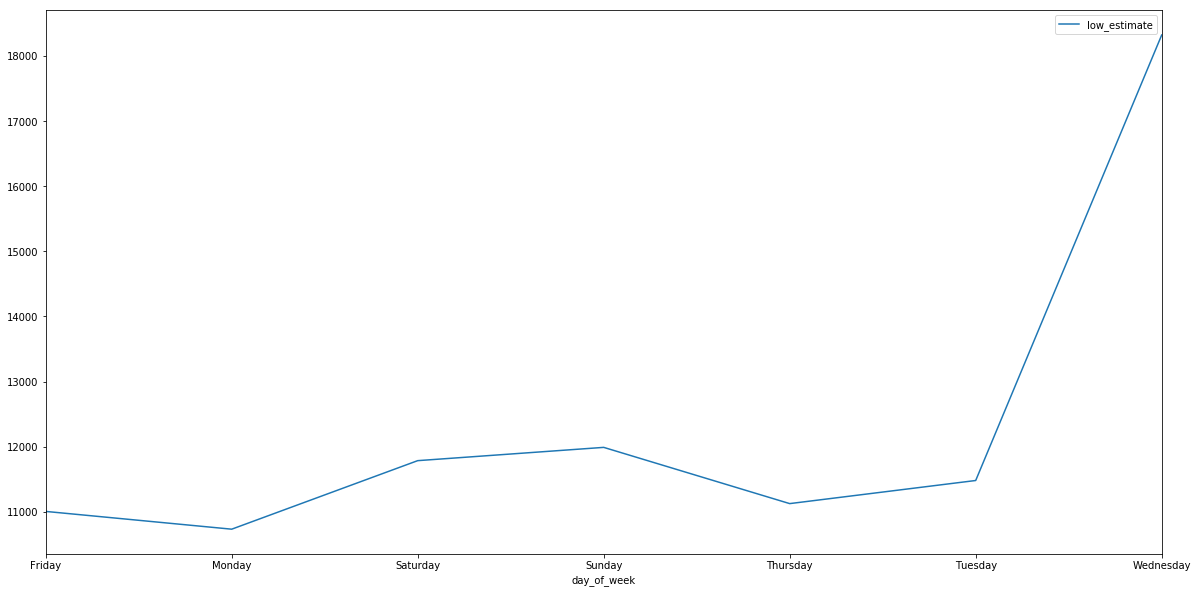

In [27]:
import numpy as np # low estimate trend based on week day
uber_by_day = uberXL[["day_of_week","low_estimate"]].groupby("day_of_week").aggregate(np.sum)
uber_by_day.plot();

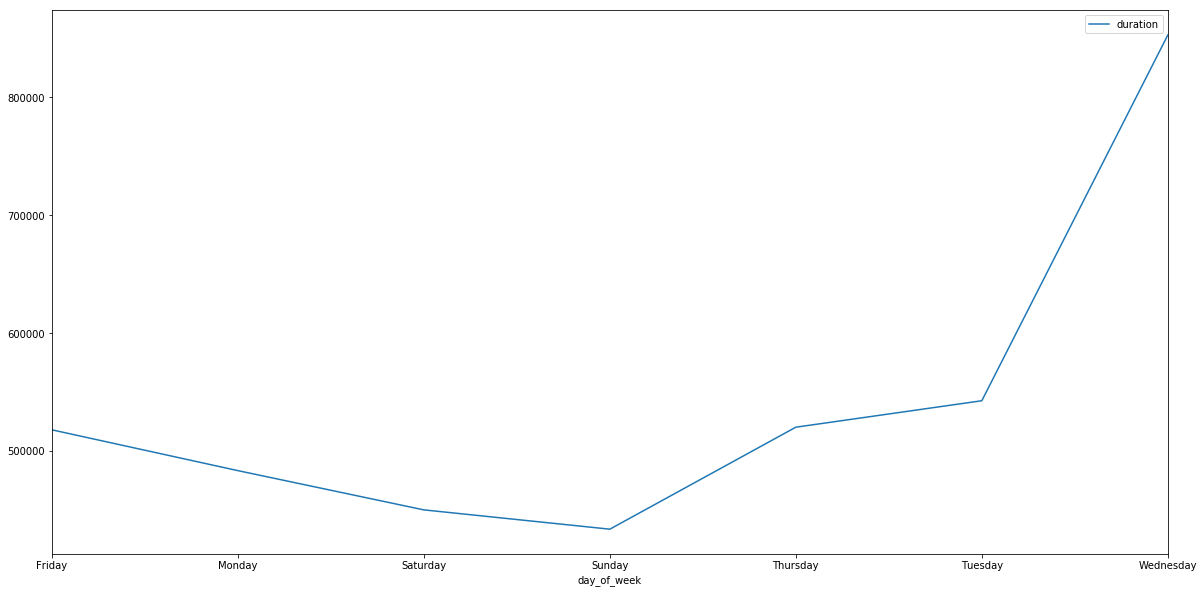

In [28]:
import numpy as np #Duration trend based on weekday
uber_by_day = uberXL[["day_of_week","duration"]].groupby("day_of_week").aggregate(np.sum)
uber_by_day.plot();

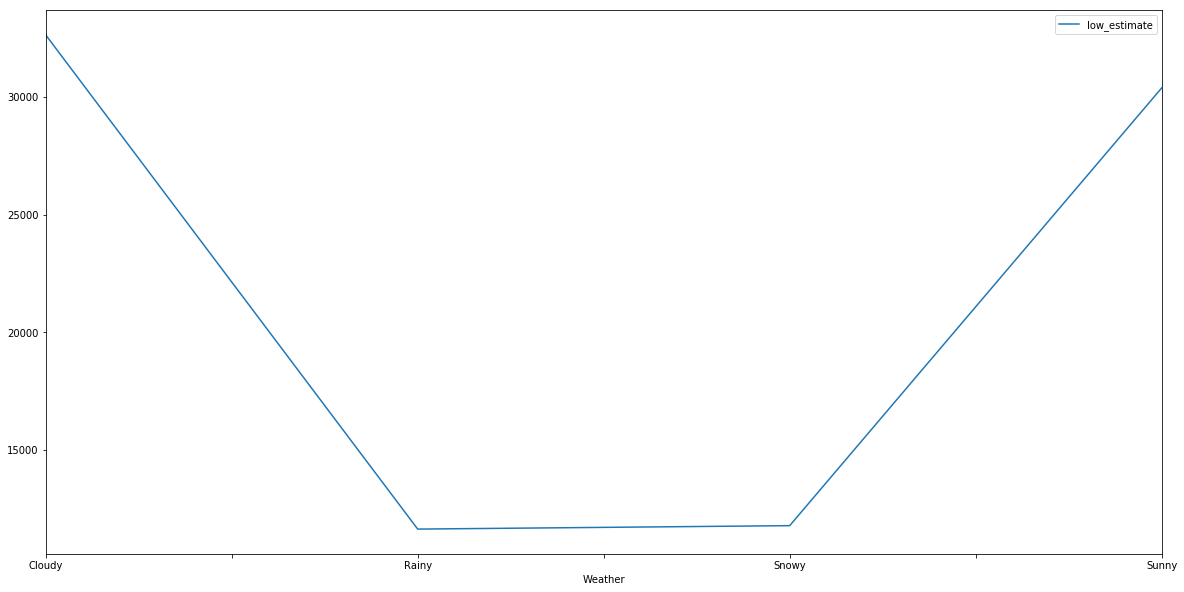

In [29]:
import numpy as np #low estimate trend based on weather
uber_by_weather = uberXL[["Weather","low_estimate"]].groupby("Weather").aggregate(np.sum)
uber_by_weather.plot();

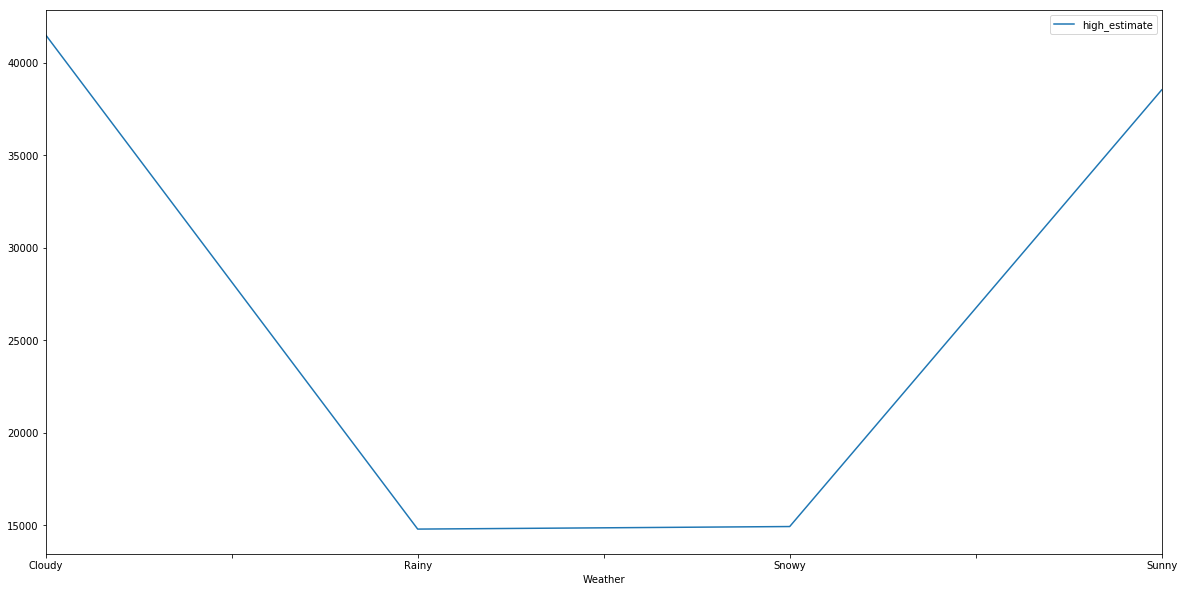

In [30]:
import numpy as np #High estimate trend based on weather
uber_by_weather = uberXL[["Weather","high_estimate"]].groupby("Weather").aggregate(np.sum)
uber_by_weather.plot();

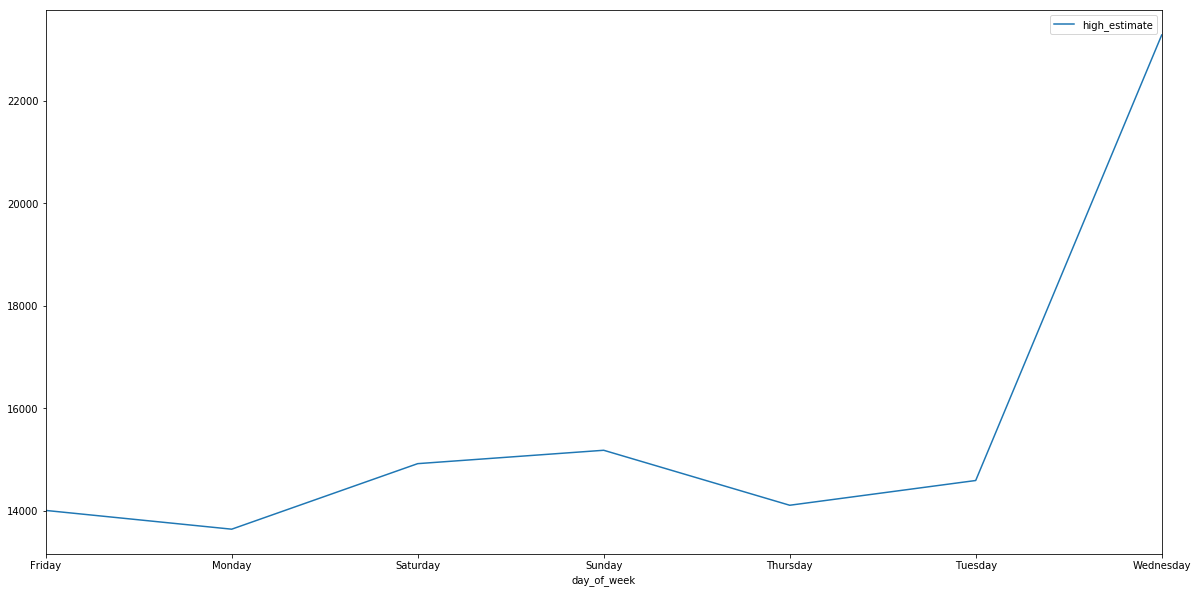

In [31]:
import numpy as np #high estimate trend based on week day
uber_by_day = uberXL[["day_of_week","high_estimate"]].groupby("day_of_week").aggregate(np.sum)
uber_by_day.plot();

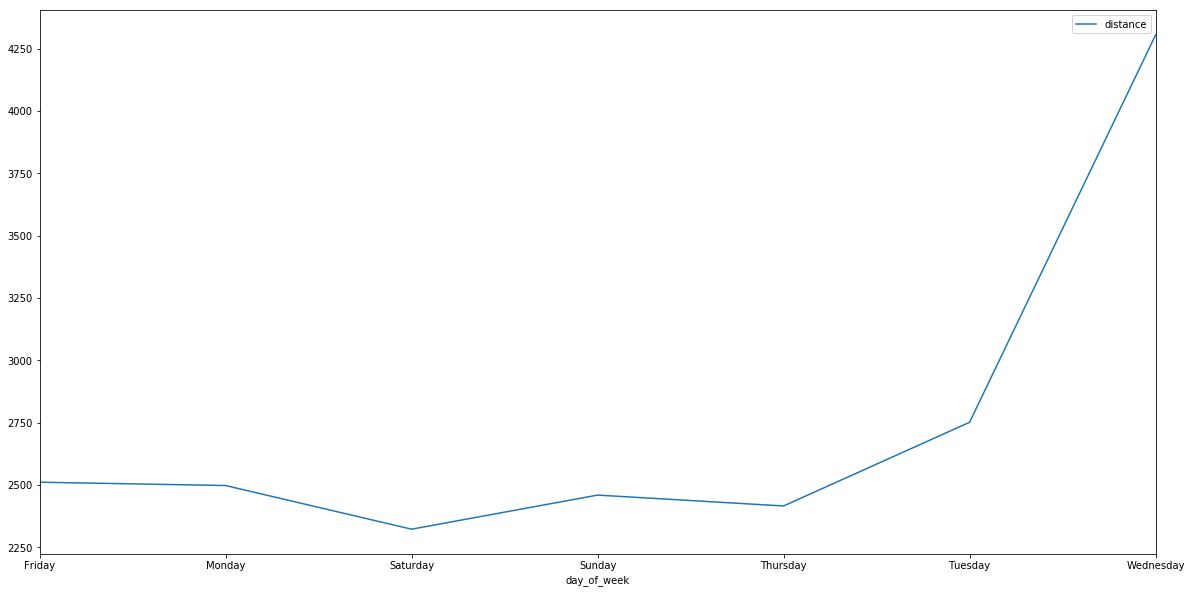

In [32]:
import numpy as np #distance trend based on weekday
uber_by_day = uberXL[["day_of_week","distance"]].groupby("day_of_week").aggregate(np.sum) # to find the day on which distance travelled is the most
uber_by_day.plot();

In [33]:
# Dropping columns of least significance for further analysis
uber.drop(['currency_code', 'estimate', 'localized_display_name', 'product_id', 'time', 'date', 'start_latitude', 'start_longitude'  ], axis =1, inplace = True) # Dropping cells as data is insignificant

In [34]:
uber.dtypes # data types check

date_time        datetime64[ns]
display_name             object
distance                float64
duration                  int64
end_latitude            float64
end_longitude           float64
high_estimate           float64
low_estimate            float64
day_of_week              object
Weather                  object
dtype: object

In [35]:
#import numpy as np
#import pandas as pd
#import holoviews as hv

#%matplotlib inline

#hv.extension('bokeh', 'matplotlib', width="100")
#%opts Curve [width=600 height=250 tools=['hover'] ] {+framewise} VLine (color="black")
#%opts Bars  [width=800 height=400 tools=['hover'] group_index=1 legend_position='top_left' xrotation=90]
#hv.extension('bokeh')

In [36]:
uber.count() # to check if null values are present

date_time        43896
display_name     43896
distance         43896
duration         43896
end_latitude     43896
end_longitude    43896
high_estimate    43896
low_estimate     43896
day_of_week      43896
Weather          43896
dtype: int64

In [37]:
print(min(uber.index)) # checkin table indexes
print(max(uber.index))

0
51210


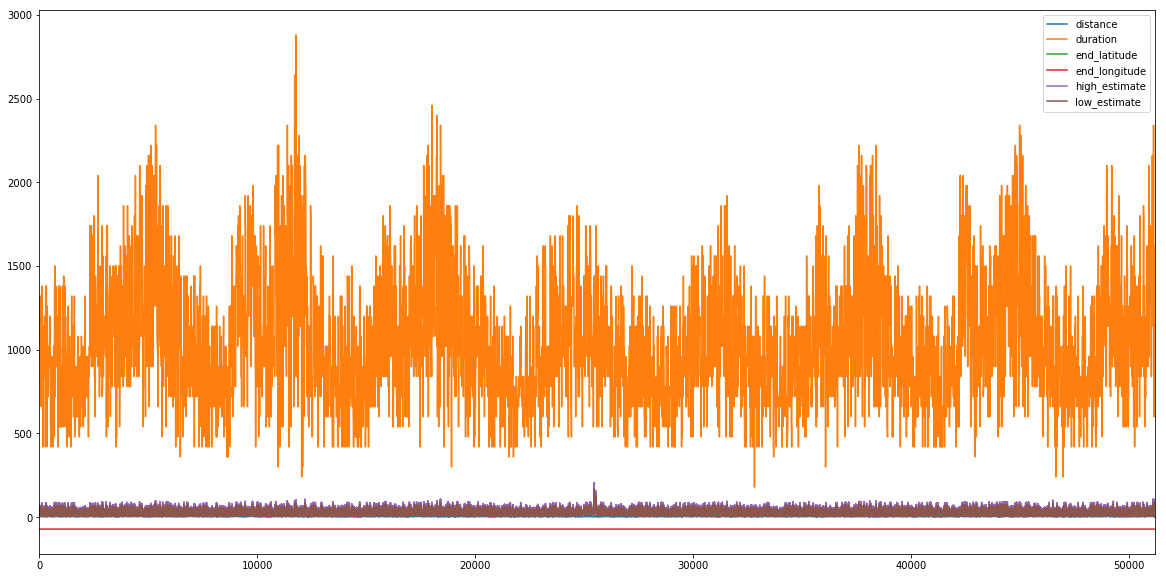

In [38]:
uber.plot()

In [39]:
days = {'Monday':0 ,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4, 'Saturday':5, 'Sunday':6}

uber['day_of_week'] = uber['day_of_week'].apply(lambda x: days[x])
#Assigning weights to days of the weeek

In [40]:
uber.head() # display dataframe

,date_time,display_name,distance,duration,end_latitude,end_longitude,high_estimate,low_estimate,day_of_week,Weather
0,2017-12-05 22:47:56,uberPOOL,8.24,1080,42.314857,-71.056782,12.0,8.0,1,Rainy
1,2017-12-05 22:47:56,uberX,8.24,1080,42.314857,-71.056782,23.0,18.0,1,Rainy
2,2017-12-05 22:47:56,uberSUV,8.24,1080,42.314857,-71.056782,63.0,50.0,1,Rainy
3,2017-12-05 22:47:56,uberXL,8.24,1080,42.314857,-71.056782,35.0,28.0,1,Rainy
4,2017-12-05 22:47:56,UberBLACK,8.24,1080,42.314857,-71.056782,51.0,41.0,1,Rainy


In [41]:
#days = {'uberWAV':1 ,'uberXL':2,'uberPOOL':3,'uberX':4,'UberBLACK':5, 'uberSUV':6}

#uber['display_name'] = uber['display_name'].apply(lambda x: days[x])

In [42]:
climate = {'Snowy':1 ,'Rainy':2,'Sunny':3,'Cloudy':4} # Number based on ascending order of the number of rides in a particular weather

uber['Weather'] = uber['Weather'].apply(lambda x: climate[x])

In [43]:
uber.head()

,date_time,display_name,distance,duration,end_latitude,end_longitude,high_estimate,low_estimate,day_of_week,Weather
0,2017-12-05 22:47:56,uberPOOL,8.24,1080,42.314857,-71.056782,12.0,8.0,1,2
1,2017-12-05 22:47:56,uberX,8.24,1080,42.314857,-71.056782,23.0,18.0,1,2
2,2017-12-05 22:47:56,uberSUV,8.24,1080,42.314857,-71.056782,63.0,50.0,1,2
3,2017-12-05 22:47:56,uberXL,8.24,1080,42.314857,-71.056782,35.0,28.0,1,2
4,2017-12-05 22:47:56,UberBLACK,8.24,1080,42.314857,-71.056782,51.0,41.0,1,2


In [44]:
uber.dtypes

date_time        datetime64[ns]
display_name             object
distance                float64
duration                  int64
end_latitude            float64
end_longitude           float64
high_estimate           float64
low_estimate            float64
day_of_week               int64
Weather                   int64
dtype: object

In [62]:
#here we will separate the 6 different types of uber services into their own dataframes
uberXL = uber[uber.display_name == 'uberXL']
uberXL.head()

,date_time,display_name,distance,duration,end_latitude,end_longitude,high_estimate,low_estimate,day_of_week,Weather
3,2017-12-05 22:47:56,uberXL,8.24,1080,42.314857,-71.056782,35.0,28.0,1,2
10,2017-12-05 22:47:56,uberXL,8.24,1080,42.314857,-71.056782,35.0,28.0,1,2
17,2017-12-05 22:48:51,uberXL,6.18,1140,42.272678,-71.093765,30.0,23.0,1,2
24,2017-12-05 22:48:51,uberXL,6.18,1140,42.272678,-71.093765,30.0,23.0,1,2
31,2017-12-05 22:51:50,uberXL,8.53,1320,42.247948,-71.173050,38.0,30.0,1,2


In [63]:
#remove duplicated datetimeindex
uberXL = uberXL[~uberXL.date_time.duplicated(keep = 'first')]
uberXL.head()

,date_time,display_name,distance,duration,end_latitude,end_longitude,high_estimate,low_estimate,day_of_week,Weather
3,2017-12-05 22:47:56,uberXL,8.24,1080,42.314857,-71.056782,35.0,28.0,1,2
17,2017-12-05 22:48:51,uberXL,6.18,1140,42.272678,-71.093765,30.0,23.0,1,2
31,2017-12-05 22:51:50,uberXL,8.53,1320,42.247948,-71.173050,38.0,30.0,1,2
45,2017-12-05 22:54:57,uberXL,3.24,840,42.338443,-71.074548,20.0,16.0,1,2
59,2017-12-05 22:57:49,uberXL,4.14,720,42.360958,-71.065895,23.0,18.0,1,2


In [64]:
# Checking if duplicates are removed
uberXL.tail()

,date_time,display_name,distance,duration,end_latitude,end_longitude,high_estimate,low_estimate,day_of_week,Weather
51145,2017-12-13 15:27:19,uberXL,1.94,600,42.346358,-71.097615,19.0,15.0,2,3
51159,2017-12-13 15:30:19,uberXL,4.57,1620,42.358536,-71.060788,37.0,29.0,2,3
51173,2017-12-13 15:33:24,uberXL,1.94,660,42.346358,-71.097615,19.0,15.0,2,3
51187,2017-12-13 15:36:21,uberXL,6.09,1440,42.350274,-71.051305,32.0,25.0,2,3
51201,2017-12-13 15:39:19,uberXL,3.20,900,42.322207,-71.170310,31.0,25.0,2,3


In [65]:
#Counting total records
uberXL.count()

date_time        3658
display_name     3658
distance         3658
duration         3658
end_latitude     3658
end_longitude    3658
high_estimate    3658
low_estimate     3658
day_of_week      3658
Weather          3658
dtype: int64

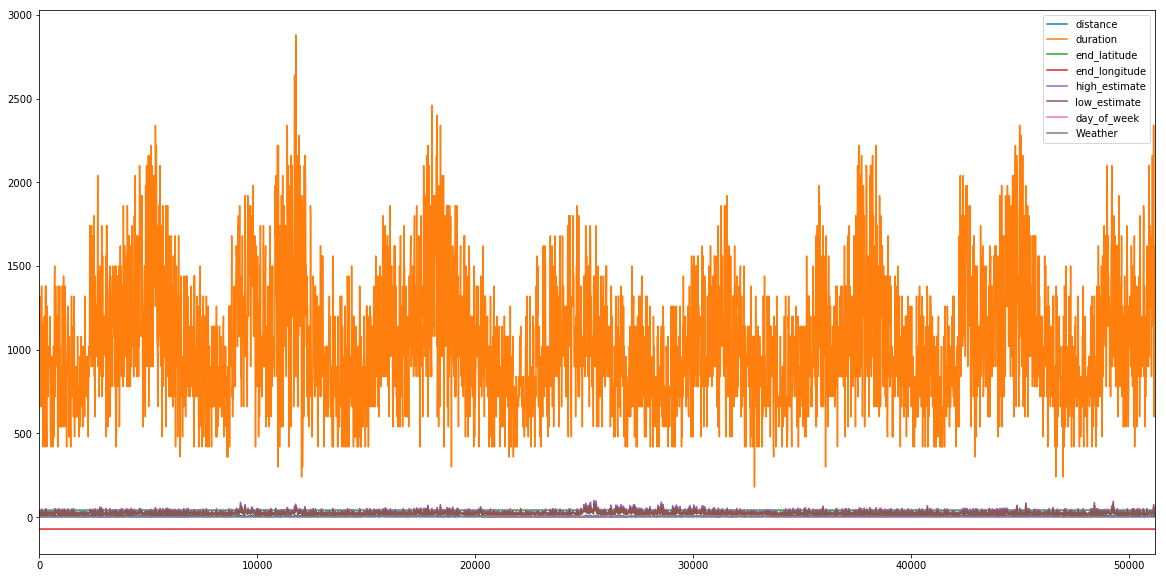

In [66]:
uberXL.plot() # plotting dataframe

In [67]:
#hv.Curve(uber_by_weather)

In [68]:
uberXL['high_estimate'].mean() # Calculate mean of high range

29.99808638600328

In [69]:
uberXL['high_estimate'].var() # Calculate variance

143.70057057826094

In [70]:
uberXL['high_estimate'].std() # Calculate Standard deviation

11.98751728166683

In [71]:
uberXL.drop(['display_name', 'date_time'], axis =1, inplace = True) # Dropping cells as data is insignificant

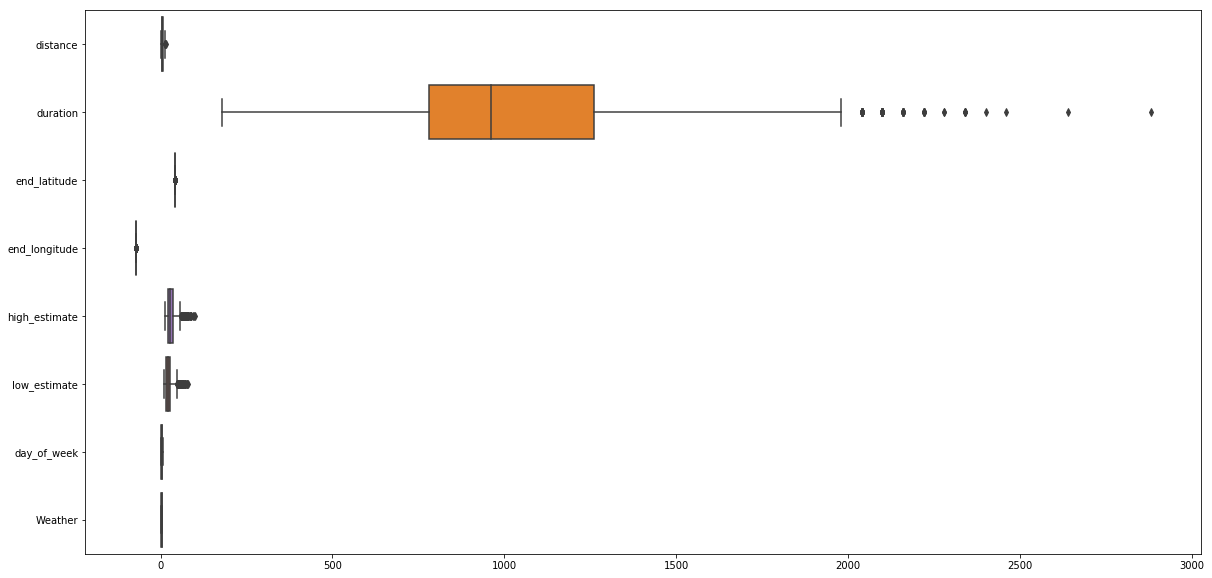

In [72]:
sns.boxplot(data=uberXL, orient="h") # to check for outliers

In [73]:
uberXL['high_estimate'] = uberXL['high_estimate'].apply(lambda x: "HH" if x>= uberXL['high_estimate'].mean() else "HL") #Converting high estimate as HH for prices greater than mean and HL for prices less than mean for analysis

In [74]:
uberXL.head() # displaying data

,distance,duration,end_latitude,end_longitude,high_estimate,low_estimate,day_of_week,Weather
3,8.24,1080,42.314857,-71.056782,HH,28.0,1,2
17,6.18,1140,42.272678,-71.093765,HH,23.0,1,2
31,8.53,1320,42.247948,-71.173050,HH,30.0,1,2
45,3.24,840,42.338443,-71.074548,HL,16.0,1,2
59,4.14,720,42.360958,-71.065895,HL,18.0,1,2


In [75]:
uberXL.groupby('high_estimate').count() # Counting the total number of records

,distance,duration,end_latitude,end_longitude,low_estimate,day_of_week,Weather
high_estimate,,,,,,,
HH,1633,1633,1633,1633,1633,1633,1633
HL,2025,2025,2025,2025,2025,2025,2025


In [76]:
uberXL.describe() # Describing columns

,distance,duration,end_latitude,end_longitude,low_estimate,day_of_week,Weather
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,5.265282,1039.043193,42.339442,-71.076939,23.628759,2.895845,2.995353
std,2.761660,391.295588,0.034898,0.037666,9.807525,1.930238,1.021363
min,1.290000,180.000000,42.247948,-71.173050,9.000000,0.000000,1.000000
25%,3.142500,780.000000,42.322207,-71.093765,16.000000,1.000000,2.000000
50%,4.695000,960.000000,42.348773,-71.074474,22.000000,3.000000,3.000000
75%,6.860000,1260.000000,42.360958,-71.057072,29.000000,5.000000,4.000000
max,14.530000,2880.000000,42.423240,-70.986913,81.000000,6.000000,4.000000


In [77]:
def scaled_df(df):
    scaled = pd.DataFrame()
    for item in df:
        if item in df.select_dtypes(include=[np.float]):
            scaled[item] = ((df[item] - df[item].min()) / 
            (df[item].max() - df[item].min()))
        else: 
            scaled[item] = df[item]
    return scaled
uberXL_scaled = scaled_df(uberXL)
# Scaling to remove outliers

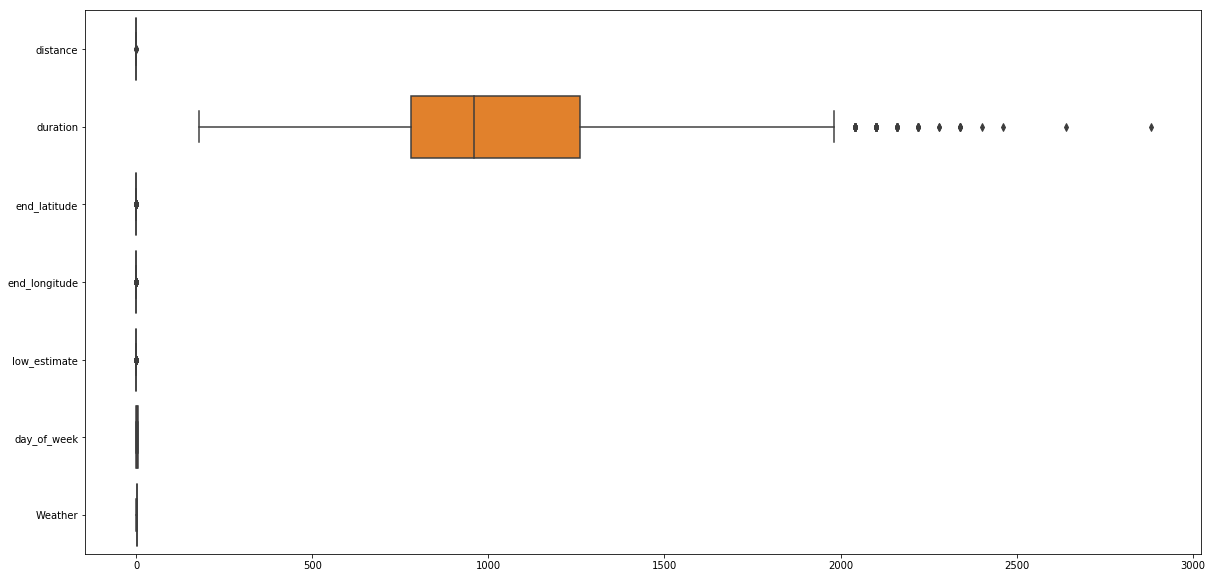

In [78]:
sns.boxplot(data=uberXL_scaled, orient="h")

In [79]:
uberXL_scaled.dtypes

distance         float64
duration           int64
end_latitude     float64
end_longitude    float64
high_estimate     object
low_estimate     float64
day_of_week        int64
Weather            int64
dtype: object

In [80]:
predictor_names = ['distance', 'duration', 'low_estimate', 'Weather', 'day_of_week', 'end_latitude', 'end_longitude']
# Defining factors affecting the ride

In [81]:
uberXL_scaled.dtypes

distance         float64
duration           int64
end_latitude     float64
end_longitude    float64
high_estimate     object
low_estimate     float64
day_of_week        int64
Weather            int64
dtype: object

In [82]:
# Defining the input and output varibles
X = uberXL_scaled[predictor_names]

#setting target
y = uberXL_scaled['high_estimate']

In [83]:

#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .4, random_state=0)

In [84]:
from sklearn import svm # importing library for support vector machines

In [85]:
#setting rbfKernel svm classifier

rbfKernel = svm.SVC(kernel='rbf', gamma=0.7, C=1.0)

print("KfoldCrossVal mean score using SVM is %s" %cross_val_score(rbfKernel,X,y,cv=10).mean())
#SVM metrics
sm = rbfKernel.fit(X_train, y_train)
y_pred = sm.predict(X_test)
print("Accuracy score using SVM is %s" %metrics.accuracy_score(y_test, y_pred))

KfoldCrossVal mean score using SVM is 0.800406551176
Accuracy score using SVM is 0.834016393443


In [86]:
from sklearn.metrics import confusion_matrix # Analysis on the model

In [87]:
True_Negative, False_Positive, False_Negative, True_Positive=confusion_matrix(y_test, y_pred).ravel()
(True_Negative, False_Positive, False_Negative, True_Positive)

(507, 162, 81, 714)

In [88]:
total = True_Negative + False_Positive + False_Negative + True_Positive
total

1464

In [89]:
misclassificationRate = False_Positive + False_Negative/ total #Analysis of results
print("misclassificationRate:", misclassificationRate)
precision = True_Positive/( False_Positive + True_Positive)
print("precision:", precision)
truePositiveRate = True_Positive / (True_Positive+False_Negative)
print("truePositiveRate : " , truePositiveRate)
falsePositiveRate = False_Positive / (True_Negative+False_Positive)
print("falsePositiveRate : ", falsePositiveRate)
Specificity = True_Negative / (True_Negative+False_Positive)
print("Specificity : ", Specificity)
Prevalence = True_Positive / total
print("Prevalence : ", Prevalence)


misclassificationRate: 162.055327869
precision: 0.815068493151
truePositiveRate :  0.898113207547
falsePositiveRate :  0.242152466368
Specificity :  0.757847533632
Prevalence :  0.487704918033


In [90]:
from sklearn.metrics import classification_report

In [91]:
report = classification_report(y_test, y_pred)
print(report)

             precision    recall  f1-score   support

         HH       0.86      0.76      0.81       669
         HL       0.82      0.90      0.85       795

avg / total       0.84      0.83      0.83      1464



In [92]:
knn_k = []
for i in range(0,33):  # try up to k=33
    if (i % 2 != 0): # Use only odd k 
        knn_k.append(i)

cross_vals = []
for k in knn_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,
                             X_train, 
                             y_train, 
                             cv = 10, 
                             scoring='accuracy')
    cross_vals.append(scores.mean())

MSE = [1 - x for x in cross_vals]
optimal_k = knn_k[MSE.index(min(MSE))]
print("Optimal K is {0}".format(optimal_k))

Optimal K is 1


In [93]:

# setting kNN classifier
knn = KNeighborsClassifier(n_neighbors=13)

# kNN cross validation

#print("KfoldCrossVal mean score using kNN is %s" %cross_val_score(knn,X,y,cv=10).mean())

# kNN metrics
kNNm = knn.fit(X_train, y_train)

y_pred = kNNm.predict(X_test)
print("Accuracy score using kNN is %s" %metrics.accuracy_score(y_test, y_pred))

Accuracy score using kNN is 0.83674863388


In [94]:
True_Negative, False_Positive, False_Negative, True_Positive=confusion_matrix(y_test, y_pred).ravel()
(True_Negative, False_Positive, False_Negative, True_Positive)

(510, 159, 80, 715)

In [95]:
report = classification_report(y_test, y_pred)
print(report)

             precision    recall  f1-score   support

         HH       0.86      0.76      0.81       669
         HL       0.82      0.90      0.86       795

avg / total       0.84      0.84      0.84      1464



In [96]:
total = True_Negative + False_Positive + False_Negative + True_Positive
total

1464

In [97]:
misclassificationRate = False_Positive + False_Negative/ total  #Analysis of results
print("misclassificationRate:", misclassificationRate)
precision = True_Positive/( False_Positive + True_Positive)
print("precision:", precision)
truePositiveRate = True_Positive / (True_Positive+False_Negative)
print("truePositiveRate : " , truePositiveRate)
falsePositiveRate = False_Positive / (True_Negative+False_Positive)
print("falsePositiveRate : ", falsePositiveRate)
Specificity = True_Negative / (True_Negative+False_Positive)
print("Specificity : ", Specificity)
Prevalence = True_Positive / total
print("Prevalence : ", Prevalence)

misclassificationRate: 159.054644809
precision: 0.818077803204
truePositiveRate :  0.899371069182
falsePositiveRate :  0.237668161435
Specificity :  0.762331838565
Prevalence :  0.488387978142


In [98]:

from sklearn.naive_bayes import MultinomialNB, GaussianNB


In [99]:
# testing accuracy of Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_class = mnb.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred_class))

0.784836065574


In [100]:
True_Negative, False_Positive, False_Negative, True_Positive=confusion_matrix(y_test, y_pred_class).ravel()
(True_Negative, False_Positive, False_Negative, True_Positive)

(470, 199, 116, 679)

In [101]:
total = True_Negative + False_Positive + False_Negative + True_Positive
total

1464

In [102]:
misclassificationRate = False_Positive + False_Negative/ total  #Analysis of results
print("misclassificationRate:", misclassificationRate)
precision = True_Positive/( False_Positive + True_Positive)
print("precision:", precision)
truePositiveRate = True_Positive / (True_Positive+False_Negative)
print("truePositiveRate : " , truePositiveRate)
falsePositiveRate = False_Positive / (True_Negative+False_Positive)
print("falsePositiveRate : ", falsePositiveRate)
Specificity = True_Negative / (True_Negative+False_Positive)
print("Specificity : ", Specificity)
Prevalence = True_Positive / total
print("Prevalence : ", Prevalence)

misclassificationRate: 199.079234973
precision: 0.773348519362
truePositiveRate :  0.854088050314
falsePositiveRate :  0.297458893871
Specificity :  0.702541106129
Prevalence :  0.463797814208


In [103]:
report = classification_report(y_test, y_pred_class)
print(report)

             precision    recall  f1-score   support

         HH       0.80      0.70      0.75       669
         HL       0.77      0.85      0.81       795

avg / total       0.79      0.78      0.78      1464



In [104]:
# testing accuracy of Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_class_gnb = gnb.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred_class_gnb))

0.950136612022


In [105]:
True_Negative, False_Positive, False_Negative, True_Positive=confusion_matrix(y_test, y_pred_class_gnb).ravel()
(True_Negative, False_Positive, False_Negative, True_Positive)

(628, 41, 32, 763)

In [106]:
total = True_Negative + False_Positive + False_Negative + True_Positive
total

1464

In [107]:
misclassificationRate = False_Positive + False_Negative/ total  #Analysis of results
print("misclassificationRate:", misclassificationRate)
precision = True_Positive/( False_Positive + True_Positive)
print("precision:", precision)
truePositiveRate = True_Positive / (True_Positive+False_Negative)
print("truePositiveRate : " , truePositiveRate)
falsePositiveRate = False_Positive / (True_Negative+False_Positive)
print("falsePositiveRate : ", falsePositiveRate)
Specificity = True_Negative / (True_Negative+False_Positive)
print("Specificity : ", Specificity)
Prevalence = True_Positive / total
print("Prevalence : ", Prevalence)

misclassificationRate: 41.0218579235
precision: 0.949004975124
truePositiveRate :  0.959748427673
falsePositiveRate :  0.0612855007474
Specificity :  0.938714499253
Prevalence :  0.521174863388


In [108]:
report = classification_report(y_test, y_pred_class_gnb)
print(report)

             precision    recall  f1-score   support

         HH       0.95      0.94      0.95       669
         HL       0.95      0.96      0.95       795

avg / total       0.95      0.95      0.95      1464

